Let's use this notebook for some experiments. 

In [1]:
from NMF import *
%matplotlib inline

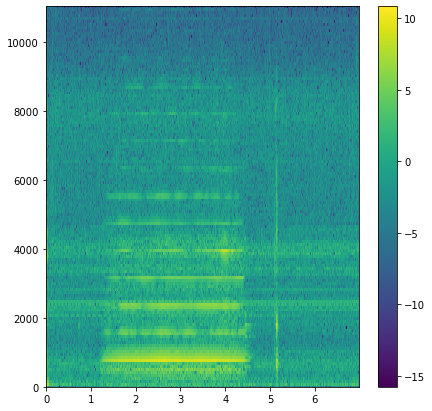

In [3]:
filename = './data/G5.wav'
ViolinRecording = Recording(filename)
ViolinSpectrogram = ViolinRecording.compute_spectrogram()
ViolinSpectrogram.visualize()
matrix_to_factorize = NMF(ViolinSpectrogram.spectrogram)
W, H, WH = matrix_to_factorize.factorize_EM_IS(10, 100)